# 📊 01. Exploratory Data Analysis (EDA)

**Цель:** Глубокий анализ данных для понимания паттернов, зависимостей и аномалий

**План:**
1. 🔢 **Univariate Analysis** - анализ каждого признака
2. 🎯 **Target Variable Analysis** - детальный анализ цены
3. 🔗 **Bivariate Analysis** - связи с целевой переменной
4. 📈 **Multivariate Analysis** - комплексные зависимости
5. 🌍 **Geographic Analysis** - анализ по городам
6. 🔬 **Statistical Tests** - статистические тесты
7. 💡 **Key Findings** - выводы и insights

---

## 🔧 Setup - Импорт и настройки

In [1]:
# Базовые библиотеки
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Статистика
from scipy import stats
from scipy.stats import shapiro, normaltest, anderson
from scipy.stats import chi2_contingency, f_oneway, ttest_ind

# Настройки
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette('husl')
%matplotlib inline

print('✅ Библиотеки загружены!')

✅ Библиотеки загружены!


In [2]:
# Загрузка данных
df = pd.read_csv('../data/raw/krisha_100.csv')

print(f'✅ Данные загружены: {df.shape[0]:,} строк × {df.shape[1]} колонок\n')
df.head(3)

✅ Данные загружены: 15,410 строк × 8 колонок



,price,area,rooms,floor,total_floors,city,microdistrict,price_per_sqm
0,105779240,130.27,4.00,4.00,5.00,Алматы,"Наурызбайский р-н, мкр Акжар, Белжайлау 47а",812000.00
1,90283600,127.16,4.00,4.00,5.00,Алматы,"Турксибский р-н, Кульджинский тр-т 80/1",710000.00
2,51502050,86.85,3.00,4.00,5.00,Алматы,"Турксибский р-н, Тараз",593000.00


---
# 1️⃣ UNIVARIATE ANALYSIS

Анализируем каждый признак отдельно

## 1.1 📐 Area (Площадь)

In [3]:
print('='*70)
print('📐 АНАЛИЗ ПЛОЩАДИ (AREA)')
print('='*70)

print(f'\n📊 Статистика:')
print(f'  Среднее:     {df["area"].mean():.2f} м²')
print(f'  Медиана:     {df["area"].median():.2f} м²')
print(f'  Мода:        {df["area"].mode()[0]:.2f} м²')
print(f'  Минимум:     {df["area"].min():.2f} м²')
print(f'  Максимум:    {df["area"].max():.2f} м²')
print(f'  Стд. откл.:  {df["area"].std():.2f} м²')

print(f'\n📈 Квартили:')
print(f'  Q1 (25%):    {df["area"].quantile(0.25):.2f} м²')
print(f'  Q2 (50%):    {df["area"].quantile(0.50):.2f} м²')
print(f'  Q3 (75%):    {df["area"].quantile(0.75):.2f} м²')
print(f'  IQR:         {df["area"].quantile(0.75) - df["area"].quantile(0.25):.2f} м²')

print(f'\n📉 Форма распределения:')
print(f'  Skewness:    {df["area"].skew():.3f}')
print(f'  Kurtosis:    {df["area"].kurtosis():.3f}')

if df['area'].skew() > 0.5:
    print('  → Положительная асимметрия (right-skewed)')
elif df['area'].skew() < -0.5:
    print('  → Отрицательная асимметрия (left-skewed)')
else:
    print('  → Примерно симметричное распределение')

📐 АНАЛИЗ ПЛОЩАДИ (AREA)

📊 Статистика:
  Среднее:     62.43 м²
  Медиана:     58.80 м²
  Мода:        45.00 м²
  Минимум:     28.70 м²
  Максимум:    160.00 м²
  Стд. откл.:  23.21 м²

📈 Квартили:
  Q1 (25%):    45.10 м²
  Q2 (50%):    58.80 м²
  Q3 (75%):    72.50 м²
  IQR:         27.40 м²

📉 Форма распределения:
  Skewness:    1.242
  Kurtosis:    1.890
  → Положительная асимметрия (right-skewed)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

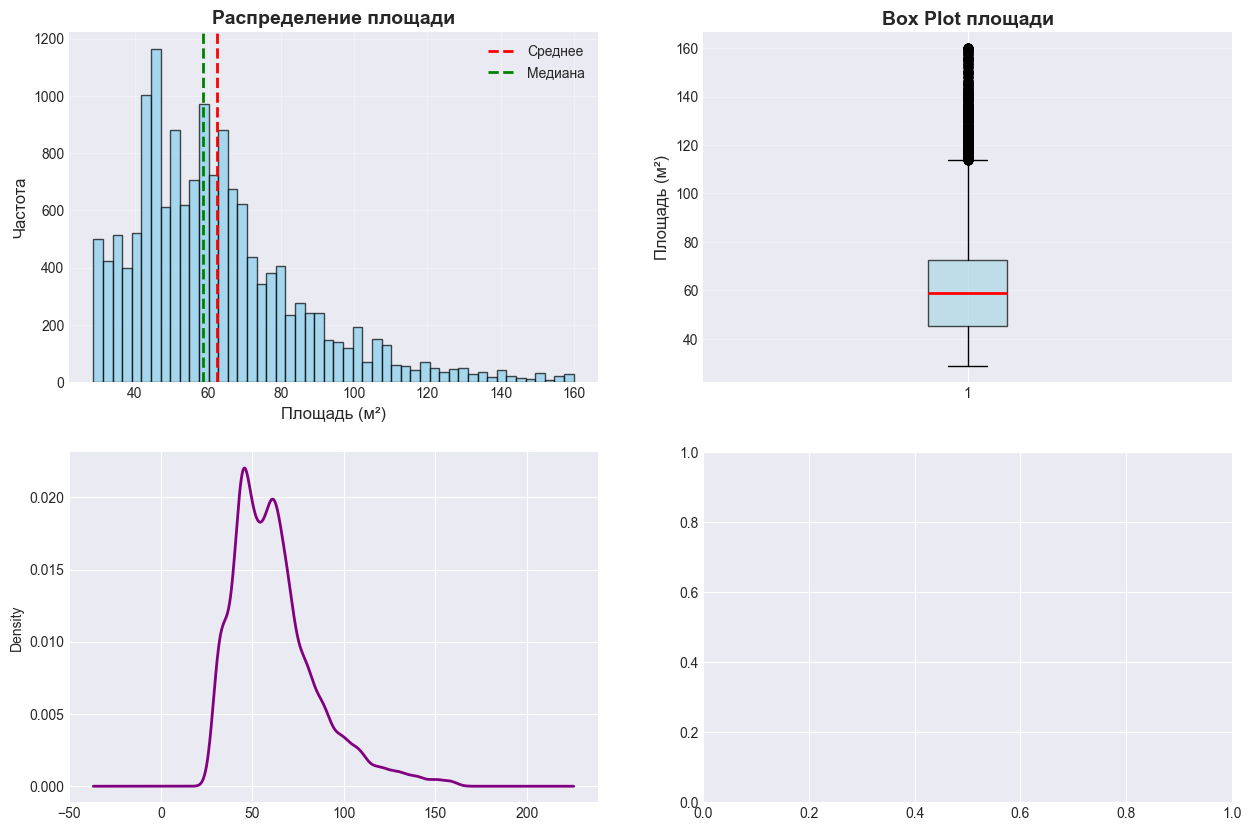

In [12]:
# Визуализация площади - 4 графика
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Гистограмма
axes[0, 0].hist(df['area'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].axvline(df['area'].mean(), color='red', linestyle='--', linewidth=2, label='Среднее')
axes[0, 0].axvline(df['area'].median(), color='green', linestyle='--', linewidth=2, label='Медиана')
axes[0, 0].set_xlabel('Площадь (м²)', fontsize=12)
axes[0, 0].set_ylabel('Частота', fontsize=12)
axes[0, 0].set_title('Распределение площади', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Box Plot
axes[0, 1].boxplot(df['area'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[0, 1].set_ylabel('Площадь (м²)', fontsize=12)
axes[0, 1].set_title('Box Plot площади', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. KDE (Kernel Density Estimate)
df['area'].plot(kind='density', ax=axes[1, 0], color='purple', linewidth=2)
axes[1, 0].fill_between(df['area'].sort_values(), 0, 
                        df['area'].sort_values().map(lambda x: stats.gaussian_kde(df['area'])(x)),
                        alpha=0.3, color='purple')
axes[1, 0].set_xlabel('Площадь (м²)', fontsize=12)
axes[1, 0].set_ylabel('Плотность', fontsize=12)
axes[1, 0].set_title('Плотность распределения (KDE)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q Plot
stats.probplot(df['area'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (проверка нормальности)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/eda/area_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print('✅ График сохранён')

## 1.2 🏠 Rooms (Комнаты)

In [5]:
print('='*70)
print('🏠 АНАЛИЗ КОЛИЧЕСТВА КОМНАТ')
print('='*70)

print(f'\n📊 Распределение:')
rooms_dist = df['rooms'].value_counts().sort_index()
for rooms, count in rooms_dist.items():
    pct = (count / len(df)) * 100
    bar = '█' * int(pct)
    print(f'  {int(rooms)}-комнатные: {count:5,} ({pct:5.1f}%) {bar}')

print(f'\n📈 Статистика:')
print(f'  Минимум:  {df["rooms"].min():.0f}')
print(f'  Максимум: {df["rooms"].max():.0f}')
print(f'  Среднее:  {df["rooms"].mean():.2f}')
print(f'  Медиана:  {df["rooms"].median():.0f}')
print(f'  Мода:     {df["rooms"].mode()[0]:.0f}')

🏠 АНАЛИЗ КОЛИЧЕСТВА КОМНАТ

📊 Распределение:
  1-комнатные: 2,868 ( 18.6%) ██████████████████
  2-комнатные: 6,059 ( 39.3%) ███████████████████████████████████████
  3-комнатные: 5,163 ( 33.5%) █████████████████████████████████
  4-комнатные: 1,208 (  7.8%) ███████
  5-комнатные:   103 (  0.7%) 
  6-комнатные:     9 (  0.1%) 

📈 Статистика:
  Минимум:  1
  Максимум: 6
  Среднее:  2.33
  Медиана:  2
  Мода:     2


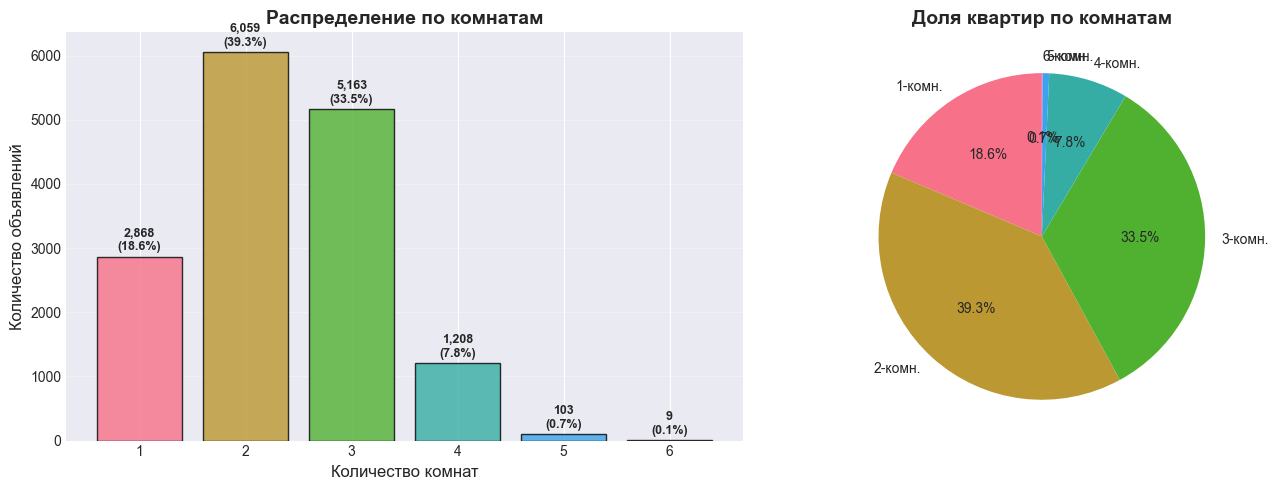

✅ График сохранён


In [11]:
# Визуализация комнат
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Bar Chart
rooms_counts = df['rooms'].value_counts().sort_index()
colors = sns.color_palette('husl', len(rooms_counts))
axes[0].bar(rooms_counts.index, rooms_counts.values, color=colors, edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Количество комнат', fontsize=12)
axes[0].set_ylabel('Количество объявлений', fontsize=12)
axes[0].set_title('Распределение по комнатам', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Добавляем значения
for i, (rooms, count) in enumerate(rooms_counts.items()):
    axes[0].text(rooms, count + 50, f'{count:,}\n({count/len(df)*100:.1f}%)', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Pie Chart
axes[1].pie(rooms_counts.values, labels=[f'{int(r)}-комн.' for r in rooms_counts.index],
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Доля квартир по комнатам', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/eda/rooms_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print('✅ График сохранён')

## 1.3 🏢 Floor & Total Floors

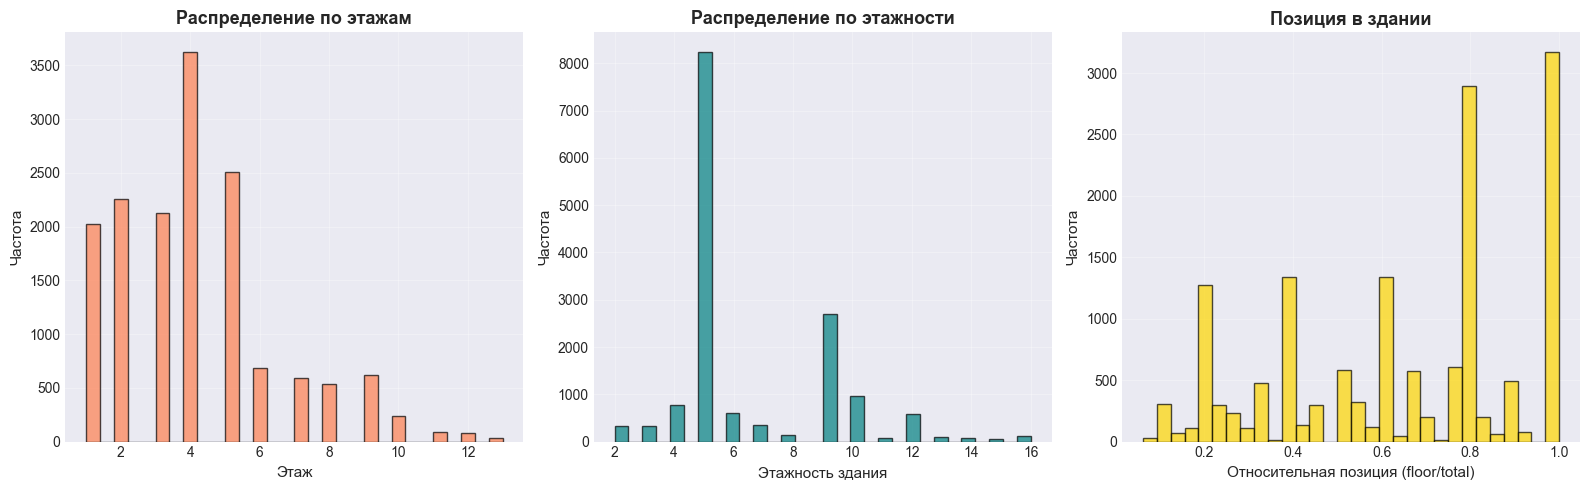


📊 Статистика этажей:
Средний этаж: 4.1
Средняя этажность здания: 6.5
Первых этажей: 2,022 (13.1%)
Последних этажей: 3,173 (20.6%)


In [10]:
# Анализ этажности
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Floor distribution
axes[0].hist(df['floor'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_xlabel('Этаж', fontsize=11)
axes[0].set_ylabel('Частота', fontsize=11)
axes[0].set_title('Распределение по этажам', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Total floors distribution
axes[1].hist(df['total_floors'], bins=30, edgecolor='black', alpha=0.7, color='teal')
axes[1].set_xlabel('Этажность здания', fontsize=11)
axes[1].set_ylabel('Частота', fontsize=11)
axes[1].set_title('Распределение по этажности', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# 3. Floor ratio
df['floor_ratio_temp'] = df['floor'] / df['total_floors']
axes[2].hist(df['floor_ratio_temp'], bins=30, edgecolor='black', alpha=0.7, color='gold')
axes[2].set_xlabel('Относительная позиция (floor/total)', fontsize=11)
axes[2].set_ylabel('Частота', fontsize=11)
axes[2].set_title('Позиция в здании', fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/eda/floor_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print('\n📊 Статистика этажей:')
print(f'Средний этаж: {df["floor"].mean():.1f}')
print(f'Средняя этажность здания: {df["total_floors"].mean():.1f}')
print(f'Первых этажей: {(df["floor"] == 1).sum():,} ({(df["floor"] == 1).mean()*100:.1f}%)')
print(f'Последних этажей: {(df["floor"] == df["total_floors"]).sum():,} '
      f'({(df["floor"] == df["total_floors"]).mean()*100:.1f}%)')

---
# 2️⃣ TARGET VARIABLE ANALYSIS - Анализ целевой переменной

In [13]:
print('='*70)
print('💰 ДЕТАЛЬНЫЙ АНАЛИЗ ЦЕНЫ (TARGET VARIABLE)')
print('='*70)

print(f'\n📊 Основная статистика:')
print(f'  Среднее:         {df["price"].mean():>15,.0f} ₸')
print(f'  Медиана:         {df["price"].median():>15,.0f} ₸')
print(f'  Мода:            {df["price"].mode()[0]:>15,.0f} ₸')
print(f'  Минимум:         {df["price"].min():>15,.0f} ₸')
print(f'  Максимум:        {df["price"].max():>15,.0f} ₸')
print(f'  Размах:          {df["price"].max() - df["price"].min():>15,.0f} ₸')
print(f'  Стд. откл.:      {df["price"].std():>15,.0f} ₸')
print(f'  Коэф. вариации:  {(df["price"].std() / df["price"].mean()) * 100:>15.1f}%')

print(f'\n📈 Квартили:')
print(f'  Q1 (25%):        {df["price"].quantile(0.25):>15,.0f} ₸')
print(f'  Q2 (50%):        {df["price"].quantile(0.50):>15,.0f} ₸')
print(f'  Q3 (75%):        {df["price"].quantile(0.75):>15,.0f} ₸')
print(f'  IQR:             {df["price"].quantile(0.75) - df["price"].quantile(0.25):>15,.0f} ₸')

print(f'\n📉 Форма распределения:')
print(f'  Skewness:        {df["price"].skew():>15.3f}')
print(f'  Kurtosis:        {df["price"].kurtosis():>15.3f}')

💰 ДЕТАЛЬНЫЙ АНАЛИЗ ЦЕНЫ (TARGET VARIABLE)

📊 Основная статистика:
  Среднее:              23,477,605 ₸
  Медиана:              19,900,000 ₸
  Мода:                 20,000,000 ₸
  Минимум:               5,500,000 ₸
  Максимум:            110,400,000 ₸
  Размах:              104,900,000 ₸
  Стд. откл.:           14,515,007 ₸
  Коэф. вариации:             61.8%

📈 Квартили:
  Q1 (25%):             14,000,000 ₸
  Q2 (50%):             19,900,000 ₸
  Q3 (75%):             28,000,000 ₸
  IQR:                  14,000,000 ₸

📉 Форма распределения:
  Skewness:                  2.026
  Kurtosis:                  5.754


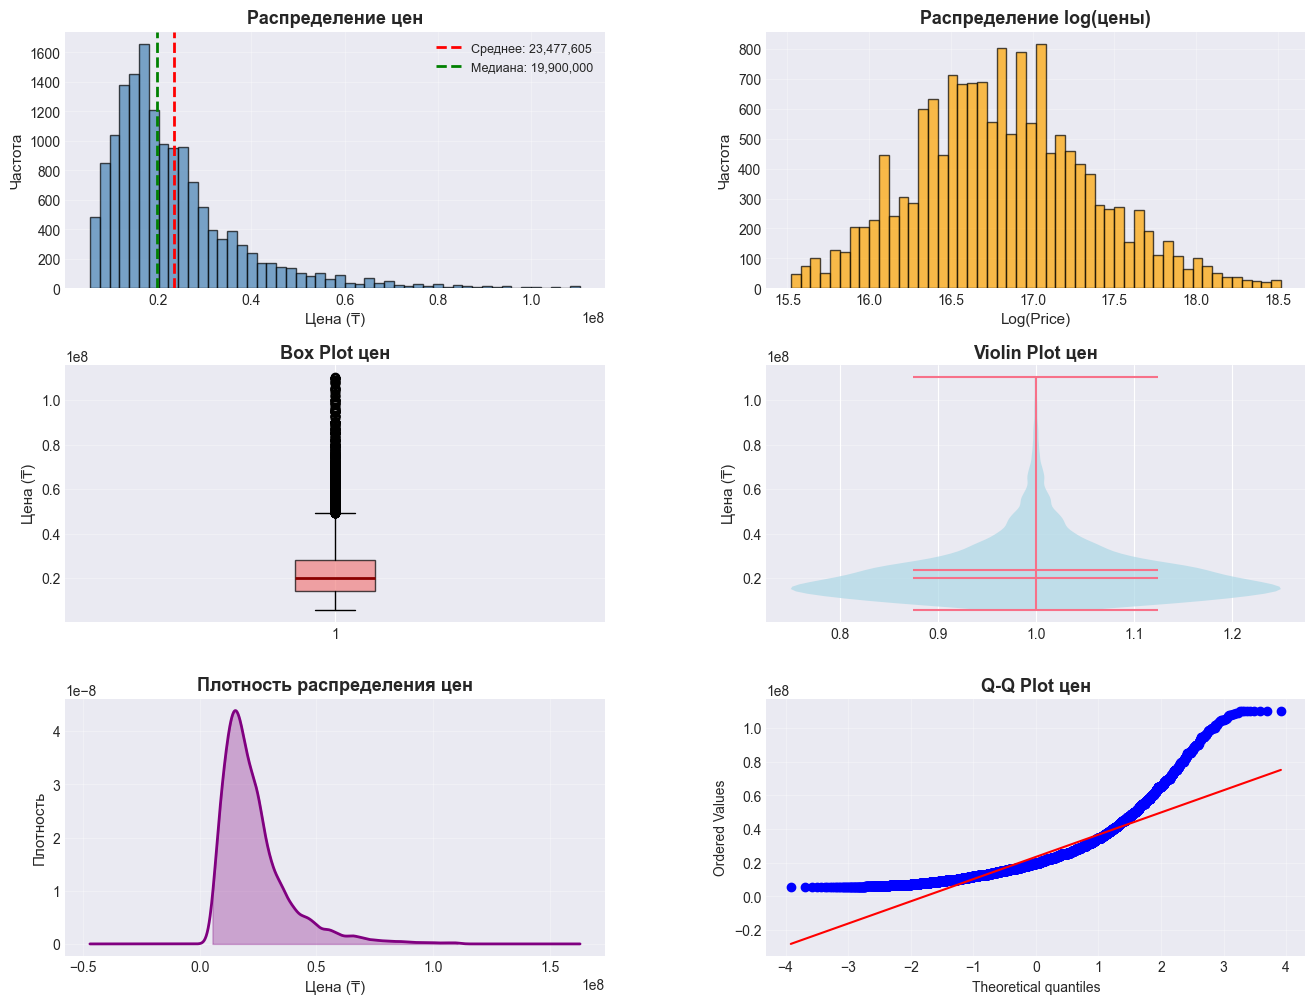

✅ График сохранён


In [14]:
# Детальная визуализация цены - 6 графиков
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Гистограмма
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(df['price'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(df['price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df["price"].mean():,.0f}')
ax1.axvline(df['price'].median(), color='green', linestyle='--', linewidth=2, label=f'Медиана: {df["price"].median():,.0f}')
ax1.set_xlabel('Цена (₸)', fontsize=11)
ax1.set_ylabel('Частота', fontsize=11)
ax1.set_title('Распределение цен', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Log-transformed price
ax2 = fig.add_subplot(gs[0, 1])
price_log = np.log1p(df['price'])
ax2.hist(price_log, bins=50, edgecolor='black', alpha=0.7, color='orange')
ax2.set_xlabel('Log(Price)', fontsize=11)
ax2.set_ylabel('Частота', fontsize=11)
ax2.set_title('Распределение log(цены)', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Box Plot
ax3 = fig.add_subplot(gs[1, 0])
ax3.boxplot(df['price'], vert=True, patch_artist=True,
           boxprops=dict(facecolor='lightcoral', alpha=0.7),
           medianprops=dict(color='darkred', linewidth=2))
ax3.set_ylabel('Цена (₸)', fontsize=11)
ax3.set_title('Box Plot цен', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# 4. Violin Plot
ax4 = fig.add_subplot(gs[1, 1])
parts = ax4.violinplot([df['price']], vert=True, showmeans=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_facecolor('lightblue')
    pc.set_alpha(0.7)
ax4.set_ylabel('Цена (₸)', fontsize=11)
ax4.set_title('Violin Plot цен', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# 5. KDE
ax5 = fig.add_subplot(gs[2, 0])
df['price'].plot(kind='density', ax=ax5, color='purple', linewidth=2)
ax5.fill_between(df['price'].sort_values(), 0,
                stats.gaussian_kde(df['price'])(df['price'].sort_values()),
                alpha=0.3, color='purple')
ax5.set_xlabel('Цена (₸)', fontsize=11)
ax5.set_ylabel('Плотность', fontsize=11)
ax5.set_title('Плотность распределения цен', fontsize=13, fontweight='bold')
ax5.grid(True, alpha=0.3)

# 6. Q-Q Plot
ax6 = fig.add_subplot(gs[2, 1])
stats.probplot(df['price'], dist="norm", plot=ax6)
ax6.set_title('Q-Q Plot цен', fontsize=13, fontweight='bold')
ax6.grid(True, alpha=0.3)

plt.savefig('../reports/figures/eda/price_detailed_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print('✅ График сохранён')

---
# 3️⃣ BIVARIATE ANALYSIS - Связи с целевой переменной

## 3.1 Price vs Area

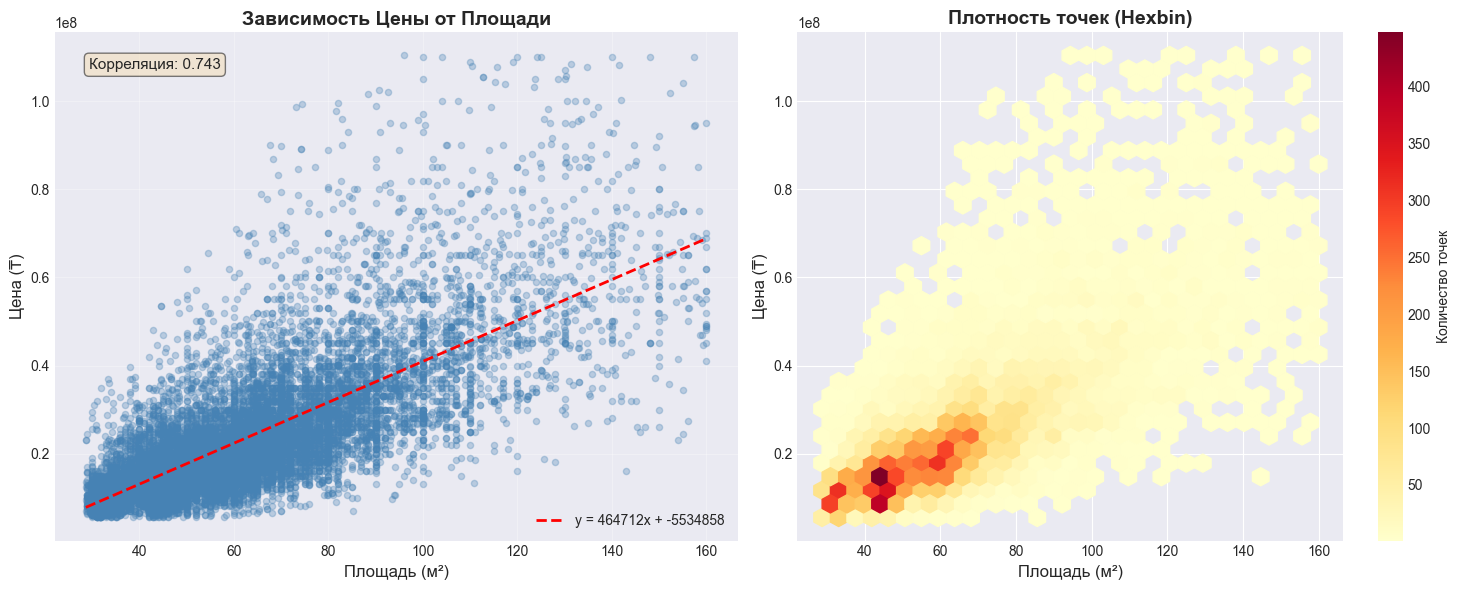


📊 Корреляция Price vs Area: 0.743
Линейная зависимость: цена увеличивается на ~464,712 ₸ за каждый м²


In [15]:
# Price vs Area - scatter plot с регрессией
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Scatter plot
axes[0].scatter(df['area'], df['price'], alpha=0.3, s=20, color='steelblue')
z = np.polyfit(df['area'], df['price'], 1)
p = np.poly1d(z)
axes[0].plot(df['area'].sort_values(), p(df['area'].sort_values()), 
            "r--", linewidth=2, label=f'y = {z[0]:.0f}x + {z[1]:.0f}')
axes[0].set_xlabel('Площадь (м²)', fontsize=12)
axes[0].set_ylabel('Цена (₸)', fontsize=12)
axes[0].set_title('Зависимость Цены от Площади', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Корреляция
corr = df['area'].corr(df['price'])
axes[0].text(0.05, 0.95, f'Корреляция: {corr:.3f}', 
            transform=axes[0].transAxes, fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Hexbin plot (для больших датасетов)
hexbin = axes[1].hexbin(df['area'], df['price'], gridsize=30, cmap='YlOrRd', mincnt=1)
axes[1].set_xlabel('Площадь (м²)', fontsize=12)
axes[1].set_ylabel('Цена (₸)', fontsize=12)
axes[1].set_title('Плотность точек (Hexbin)', fontsize=14, fontweight='bold')
plt.colorbar(hexbin, ax=axes[1], label='Количество точек')

plt.tight_layout()
plt.savefig('../reports/figures/eda/price_vs_area.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'\n📊 Корреляция Price vs Area: {corr:.3f}')
print(f'Линейная зависимость: цена увеличивается на ~{z[0]:,.0f} ₸ за каждый м²')

## 3.2 Price vs Rooms

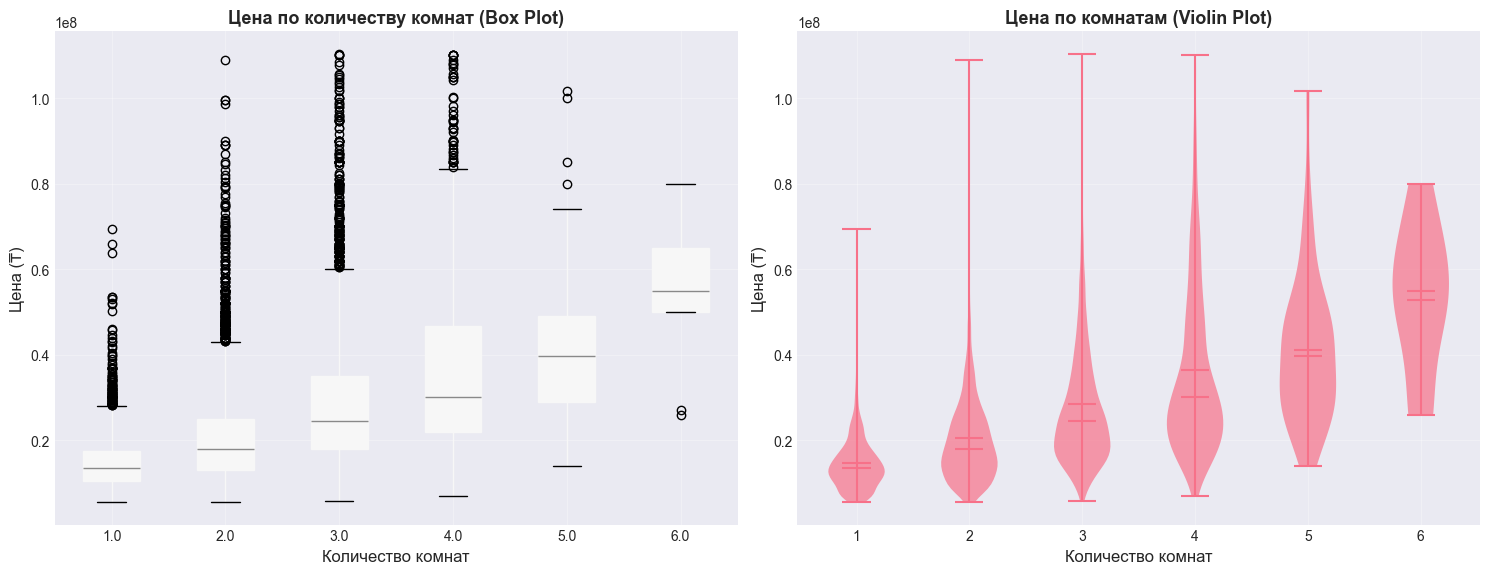


📊 Средняя цена по количеству комнат:
               mean        median  count
rooms                                   
1.00   14,671,805 ₸  13,500,000 ₸   2868
2.00   20,552,090 ₸  18,033,800 ₸   6059
3.00   28,348,329 ₸  24,500,000 ₸   5163
4.00   36,512,220 ₸  30,000,000 ₸   1208
5.00   41,173,333 ₸  39,683,600 ₸    103
6.00   52,888,889 ₸  55,000,000 ₸      9


In [16]:
# Price vs Rooms - box plot и violin plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Box Plot
df.boxplot(column='price', by='rooms', ax=axes[0], patch_artist=True)
axes[0].set_xlabel('Количество комнат', fontsize=12)
axes[0].set_ylabel('Цена (₸)', fontsize=12)
axes[0].set_title('Цена по количеству комнат (Box Plot)', fontsize=13, fontweight='bold')
axes[0].get_figure().suptitle('')  # Убираем default title
axes[0].grid(True, alpha=0.3)

# 2. Violin Plot
room_values = sorted(df['rooms'].unique())
data_to_plot = [df[df['rooms'] == r]['price'].values for r in room_values]
parts = axes[1].violinplot(data_to_plot, positions=room_values, showmeans=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_alpha(0.7)
axes[1].set_xlabel('Количество комнат', fontsize=12)
axes[1].set_ylabel('Цена (₸)', fontsize=12)
axes[1].set_title('Цена по комнатам (Violin Plot)', fontsize=13, fontweight='bold')
axes[1].set_xticks(room_values)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/eda/price_vs_rooms.png', dpi=300, bbox_inches='tight')
plt.show()

# Статистика по комнатам
print('\n📊 Средняя цена по количеству комнат:')
price_by_rooms = df.groupby('rooms')['price'].agg(['mean', 'median', 'count'])
price_by_rooms['mean'] = price_by_rooms['mean'].apply(lambda x: f'{x:,.0f} ₸')
price_by_rooms['median'] = price_by_rooms['median'].apply(lambda x: f'{x:,.0f} ₸')
print(price_by_rooms)

## 3.3 Price vs Floor Ratio

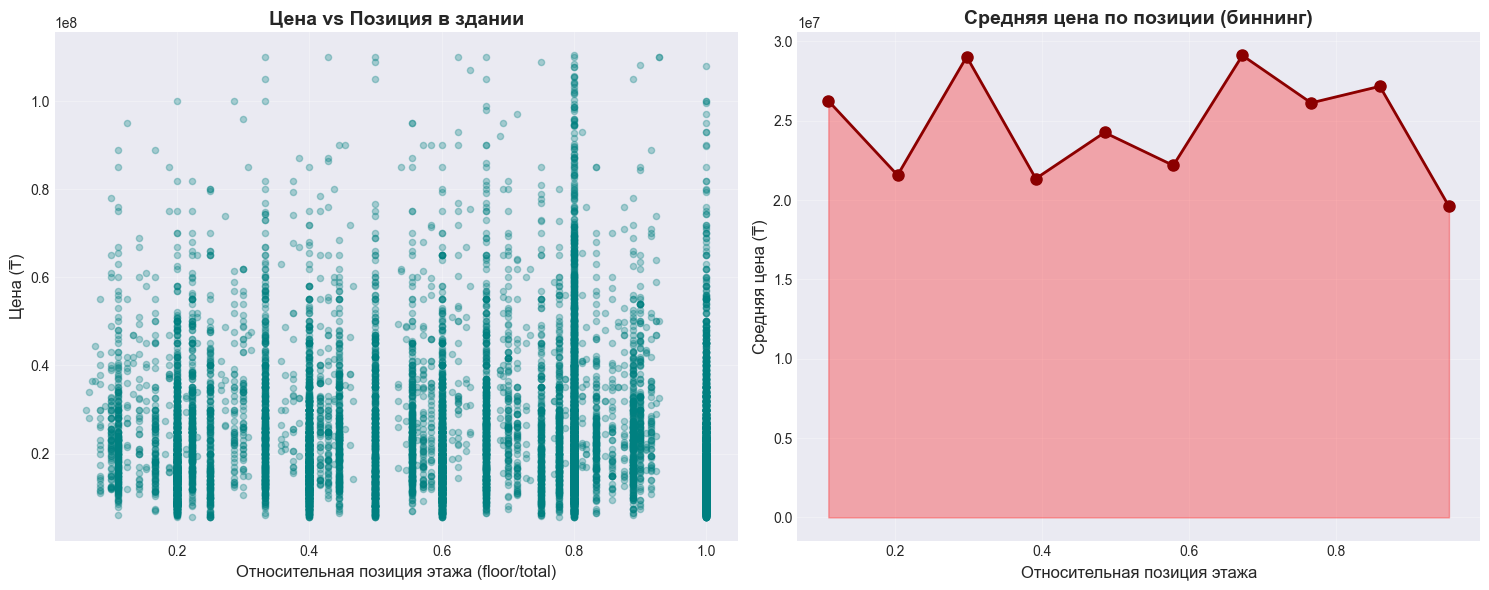


📊 Средняя цена по типу этажа:
  Первый этаж:       19,672,555 ₸
  Средние этажи:      25,546,512 ₸
  Последний этаж:      19,241,842 ₸

💡 Наблюдается U-образная зависимость: средние этажи дороже!


In [17]:
# Price vs Floor Ratio
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Scatter plot
axes[0].scatter(df['floor_ratio_temp'], df['price'], alpha=0.3, s=20, color='teal')
axes[0].set_xlabel('Относительная позиция этажа (floor/total)', fontsize=12)
axes[0].set_ylabel('Цена (₸)', fontsize=12)
axes[0].set_title('Цена vs Позиция в здании', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Binned average
df['floor_ratio_bin'] = pd.cut(df['floor_ratio_temp'], bins=10)
binned_data = df.groupby('floor_ratio_bin')['price'].mean()
bin_centers = [interval.mid for interval in binned_data.index]
axes[1].plot(bin_centers, binned_data.values, marker='o', linewidth=2, markersize=8, color='darkred')
axes[1].fill_between(bin_centers, binned_data.values, alpha=0.3, color='red')
axes[1].set_xlabel('Относительная позиция этажа', fontsize=12)
axes[1].set_ylabel('Средняя цена (₸)', fontsize=12)
axes[1].set_title('Средняя цена по позиции (биннинг)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/eda/price_vs_floor.png', dpi=300, bbox_inches='tight')
plt.show()

# Проверка U-образной зависимости
first_floor_price = df[df['floor'] == 1]['price'].mean()
middle_floor_price = df[(df['floor'] != 1) & (df['floor'] != df['total_floors'])]['price'].mean()
last_floor_price = df[df['floor'] == df['total_floors']]['price'].mean()

print(f'\n📊 Средняя цена по типу этажа:')
print(f'  Первый этаж:  {first_floor_price:>15,.0f} ₸')
print(f'  Средние этажи: {middle_floor_price:>15,.0f} ₸')
print(f'  Последний этаж: {last_floor_price:>15,.0f} ₸')

if middle_floor_price > first_floor_price and middle_floor_price > last_floor_price:
    print('\n💡 Наблюдается U-образная зависимость: средние этажи дороже!')

---
# 4️⃣ MULTIVARIATE ANALYSIS - Комплексные зависимости

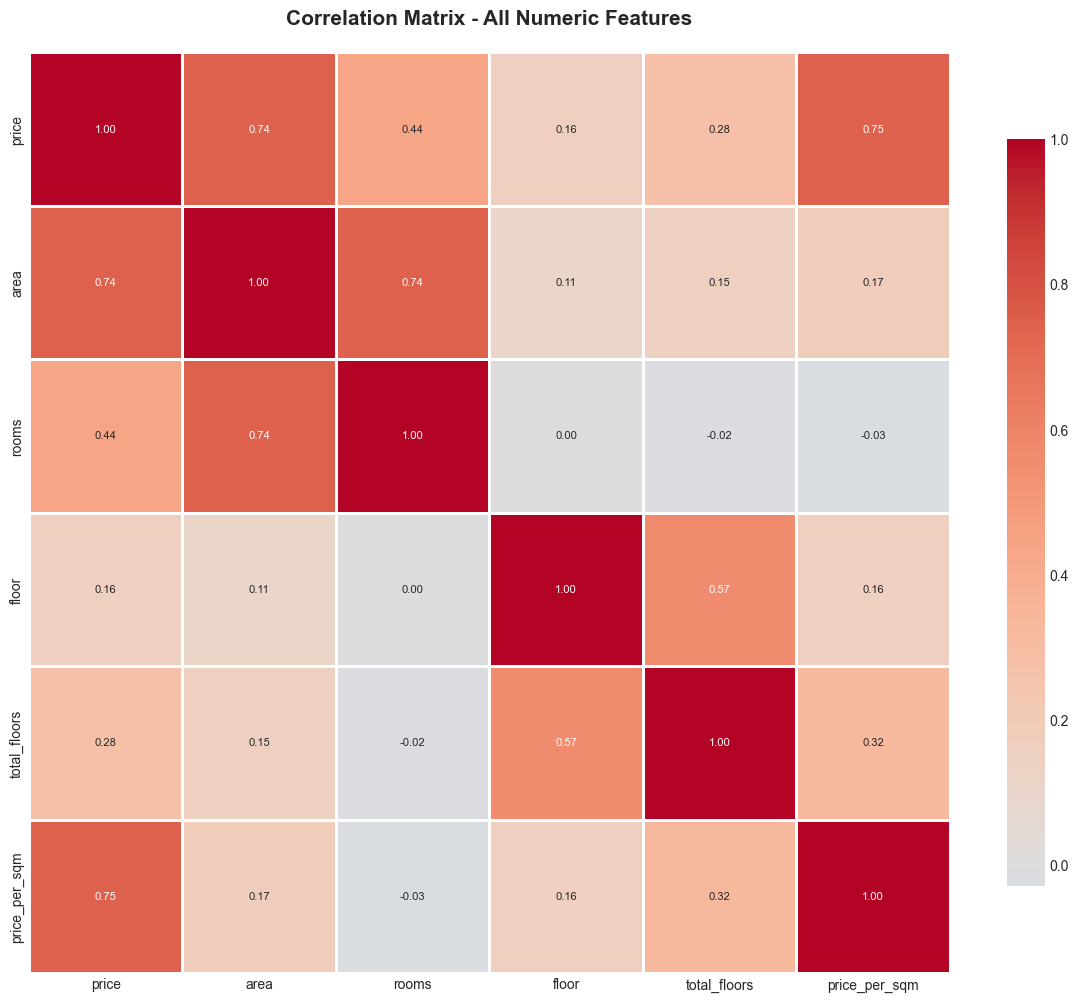


📊 Корреляция с ценой (топ-5 положительных):
price_per_sqm   0.75
area            0.74
rooms           0.44
total_floors    0.28
floor           0.16
Name: price, dtype: float64

Топ-3 отрицательных:
rooms          0.44
total_floors   0.28
floor          0.16
Name: price, dtype: float64


In [18]:
# Correlation Matrix - только числовые признаки
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Убираем временные колонки
numeric_cols = [col for col in numeric_cols if not col.endswith('_temp') and not col.endswith('_bin')]

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8}, annot_kws={'size': 8})
plt.title('Correlation Matrix - All Numeric Features', fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../reports/figures/eda/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Топ корреляций с ценой
price_corr = corr_matrix['price'].sort_values(ascending=False)
print('\n📊 Корреляция с ценой (топ-5 положительных):')
print(price_corr.head(6)[1:])  # Исключаем саму цену
print('\nТоп-3 отрицательных:')
print(price_corr.tail(3))

🔄 Создание pairplot (может занять время)...


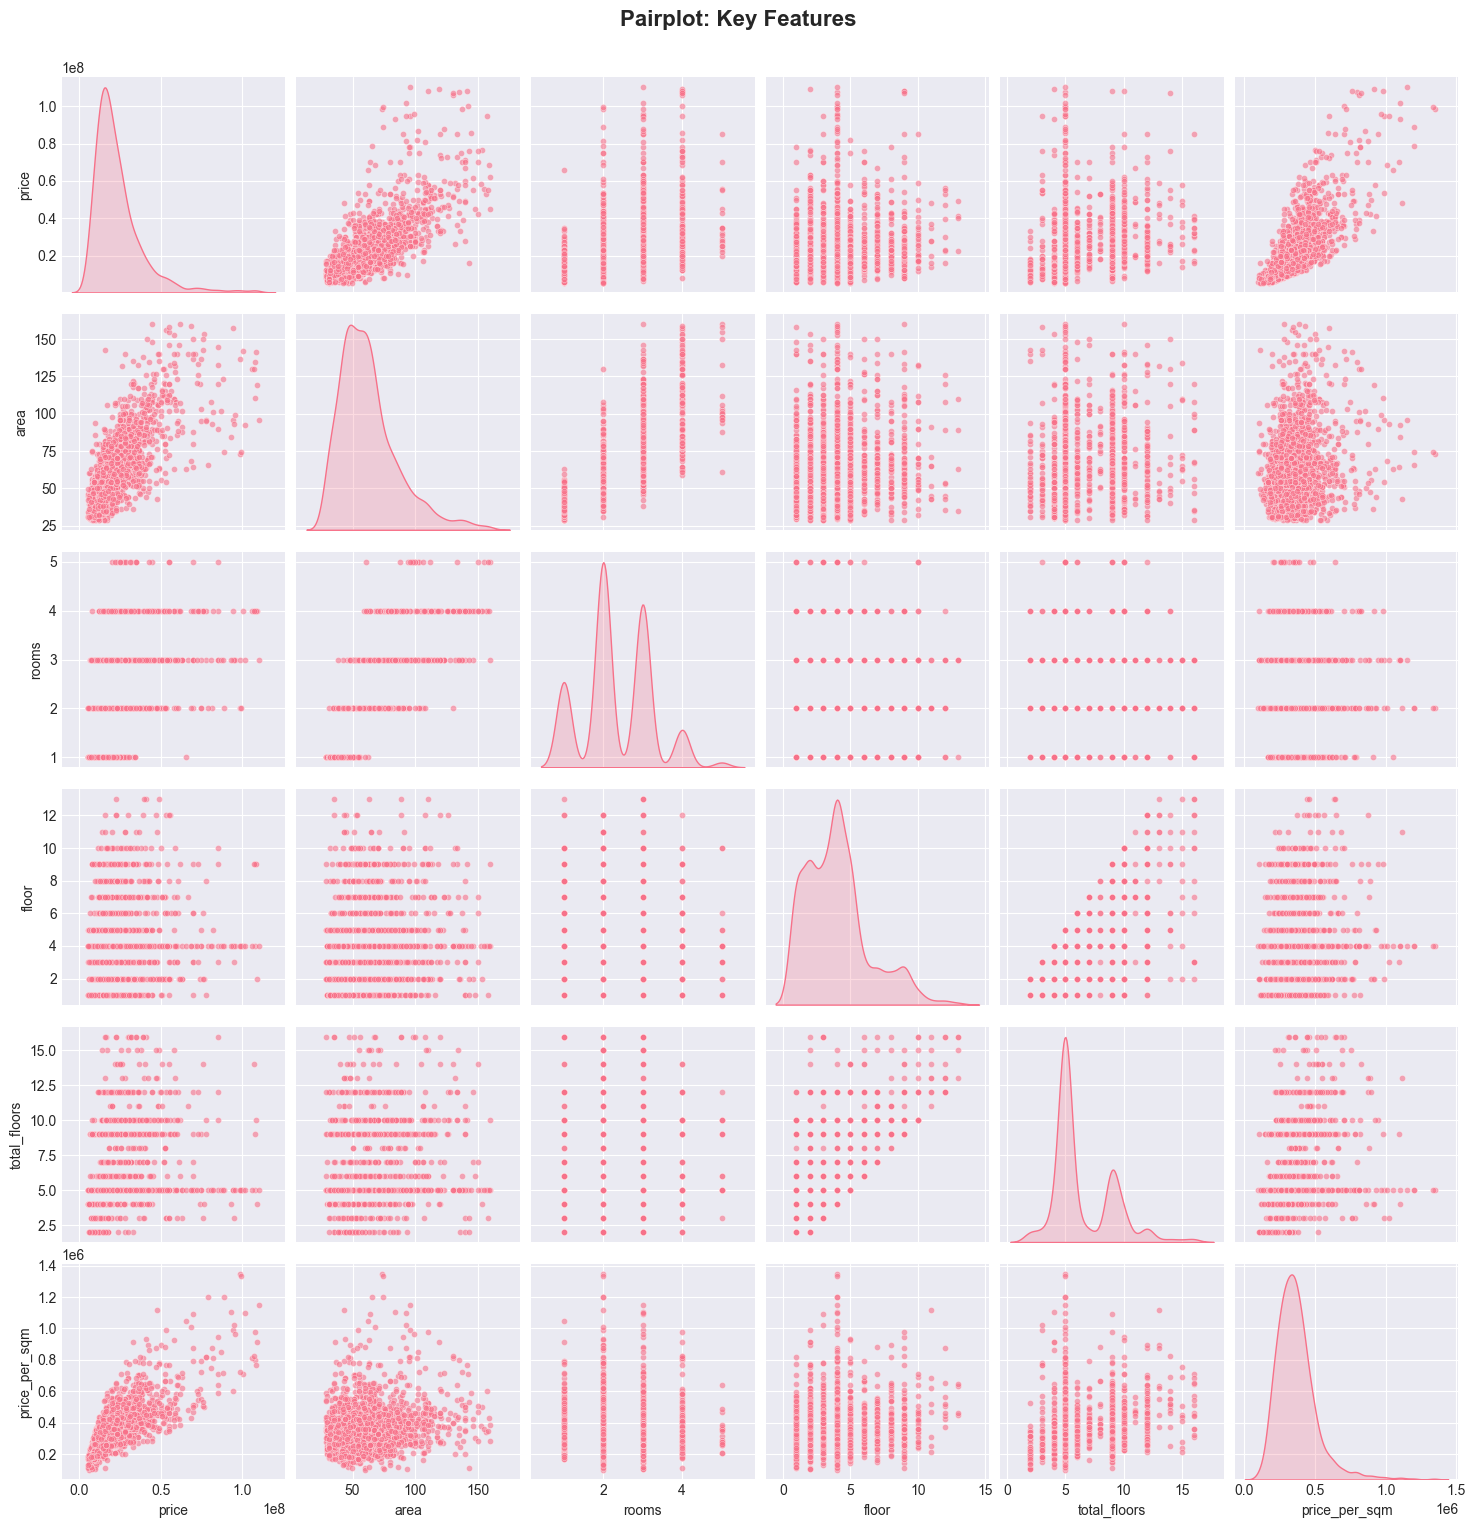

✅ Pairplot создан


In [19]:
# Pairplot для ключевых признаков
key_features = ['price', 'area', 'rooms', 'floor', 'total_floors']
if 'price_per_sqm' in df.columns:
    key_features.append('price_per_sqm')

print('🔄 Создание pairplot (может занять время)...')
sample_df = df[key_features].sample(min(2000, len(df)), random_state=42)
pairplot = sns.pairplot(sample_df, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 20})
pairplot.fig.suptitle('Pairplot: Key Features', y=1.02, fontsize=16, fontweight='bold')
plt.savefig('../reports/figures/eda/pairplot.png', dpi=200, bbox_inches='tight')
plt.show()
print('✅ Pairplot создан')

---
# 5️⃣ GEOGRAPHIC ANALYSIS - Анализ по городам

In [20]:
# Анализ цен по городам
print('='*70)
print('🌍 ГЕОГРАФИЧЕСКИЙ АНАЛИЗ')
print('='*70)

city_stats = df.groupby('city')['price'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)

print(f'\nВсего городов: {df["city"].nunique()}')
print(f'\nТоп-10 городов по средней цене:')
print(city_stats.head(10))

🌍 ГЕОГРАФИЧЕСКИЙ АНАЛИЗ

Всего городов: 21

Топ-10 городов по средней цене:
                        mean      median  count         std
city                                                       
Алматы           45767998.23 40000000.00    643 20750921.67
Астана           36126569.00 29800000.00    619 19489033.49
Шымкент          33236796.09 28087500.00    738 17724905.01
Атырау           30916697.13 27000000.00    765 15870888.72
Костанай         26641886.14 23500000.00    719 13395031.26
Караганда        25402731.47 21500000.00    733 15296236.30
Усть-Каменогорск 25348421.51 22000000.00    758 13277870.11
Актобе           24940636.55 22000000.00    752 12714242.70
Актау            23706155.89 20000000.00    734 13637411.08
Павлодар         22856633.19 20150000.00    732 10210585.41


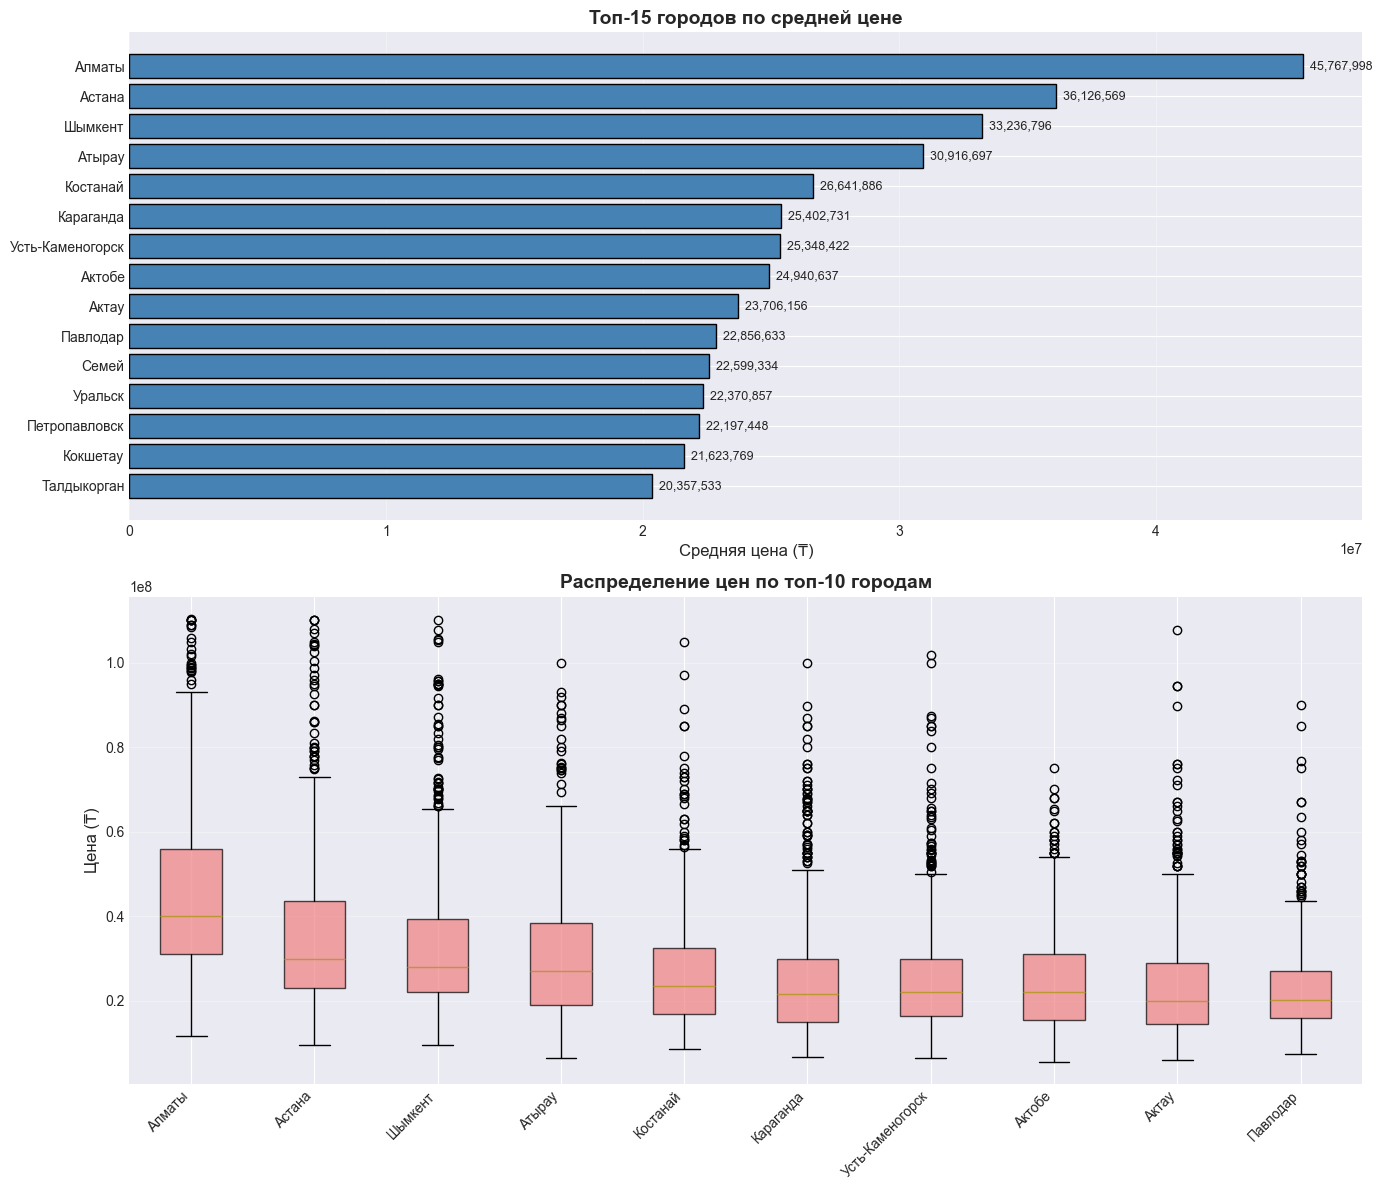

In [21]:
# Визуализация по городам
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# 1. Bar chart - средняя цена топ-15 городов
top_cities = city_stats.head(15)
axes[0].barh(range(len(top_cities)), top_cities['mean'].values, color='steelblue', edgecolor='black')
axes[0].set_yticks(range(len(top_cities)))
axes[0].set_yticklabels(top_cities.index, fontsize=10)
axes[0].set_xlabel('Средняя цена (₸)', fontsize=12)
axes[0].set_title('Топ-15 городов по средней цене', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Добавляем значения
for i, val in enumerate(top_cities['mean'].values):
    axes[0].text(val, i, f'  {val:,.0f}', va='center', fontsize=9)

# 2. Box plot - распределение цен по топ-10 городам
top_10_cities = city_stats.head(10).index.tolist()
data_to_plot = [df[df['city'] == city]['price'].values for city in top_10_cities]

bp = axes[1].boxplot(data_to_plot, labels=top_10_cities, patch_artist=True, vert=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightcoral')
    patch.set_alpha(0.7)

axes[1].set_xticklabels(top_10_cities, rotation=45, ha='right', fontsize=10)
axes[1].set_ylabel('Цена (₸)', fontsize=12)
axes[1].set_title('Распределение цен по топ-10 городам', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../reports/figures/eda/price_by_city.png', dpi=300, bbox_inches='tight')
plt.show()

---
# 6️⃣ STATISTICAL TESTS - Статистические тесты

In [22]:
print('='*70)
print('🔬 СТАТИСТИЧЕСКИЕ ТЕСТЫ')
print('='*70)

# 1. Тест на нормальность (Shapiro-Wilk)
print('\n1️⃣ ТЕСТ НА НОРМАЛЬНОСТЬ (Shapiro-Wilk):')
sample_size = min(5000, len(df))

for col in ['price', 'area']:
    sample = df[col].sample(sample_size, random_state=42)
    stat, p_value = shapiro(sample)
    
    print(f'\n  {col}:')
    print(f'    Статистика: {stat:.6f}')
    print(f'    P-value:    {p_value:.6f}')
    
    if p_value > 0.05:
        print(f'    ✅ Нормальное распределение (p > 0.05)')
    else:
        print(f'    ❌ НЕ нормальное распределение (p < 0.05)')

🔬 СТАТИСТИЧЕСКИЕ ТЕСТЫ

1️⃣ ТЕСТ НА НОРМАЛЬНОСТЬ (Shapiro-Wilk):

  price:
    Статистика: 0.811380
    P-value:    0.000000
    ❌ НЕ нормальное распределение (p < 0.05)

  area:
    Статистика: 0.910924
    P-value:    0.000000
    ❌ НЕ нормальное распределение (p < 0.05)


In [23]:
# 2. ANOVA - сравнение цен по количеству комнат
print('\n2️⃣ ANOVA TEST - Цены по количеству комнат:')

room_groups = [df[df['rooms'] == r]['price'].values for r in sorted(df['rooms'].unique())]
f_stat, p_value = f_oneway(*room_groups)

print(f'  F-статистика: {f_stat:.2f}')
print(f'  P-value:      {p_value:.6f}')

if p_value < 0.05:
    print(f'  ✅ Есть статистически значимые различия между группами (p < 0.05)')
else:
    print(f'  ❌ Нет значимых различий (p >= 0.05)')


2️⃣ ANOVA TEST - Цены по количеству комнат:
  F-статистика: 759.44
  P-value:      0.000000
  ✅ Есть статистически значимые различия между группами (p < 0.05)


In [24]:
# 3. T-test - сравнение первого этажа vs остальных
print('\n3️⃣ T-TEST - Первый этаж vs Остальные:')

first_floor = df[df['floor'] == 1]['price']
other_floors = df[df['floor'] != 1]['price']

t_stat, p_value = ttest_ind(first_floor, other_floors)

print(f'  T-статистика: {t_stat:.3f}')
print(f'  P-value:      {p_value:.6f}')
print(f'  Средняя цена первого этажа: {first_floor.mean():,.0f} ₸')
print(f'  Средняя цена остальных:     {other_floors.mean():,.0f} ₸')
print(f'  Разница:                    {first_floor.mean() - other_floors.mean():,.0f} ₸')

if p_value < 0.05:
    print(f'  ✅ Различие статистически значимо (p < 0.05)')
    if first_floor.mean() < other_floors.mean():
        print(f'  💡 Первый этаж ДЕШЕВЛЕ в среднем на {(1 - first_floor.mean()/other_floors.mean())*100:.1f}%')
else:
    print(f'  ❌ Различие незначимо (p >= 0.05)')


3️⃣ T-TEST - Первый этаж vs Остальные:
  T-статистика: -12.712
  P-value:      0.000000
  Средняя цена первого этажа: 19,672,555 ₸
  Средняя цена остальных:     24,052,285 ₸
  Разница:                    -4,379,730 ₸
  ✅ Различие статистически значимо (p < 0.05)
  💡 Первый этаж ДЕШЕВЛЕ в среднем на 18.2%


In [25]:
# 4. ANOVA по городам (топ-5)
print('\n4️⃣ ANOVA TEST - Цены по топ-5 городам:')

top_5_cities = city_stats.head(5).index.tolist()
city_groups = [df[df['city'] == city]['price'].values for city in top_5_cities]
f_stat, p_value = f_oneway(*city_groups)

print(f'  Города: {", ".join(top_5_cities)}')
print(f'  F-статистика: {f_stat:.2f}')
print(f'  P-value:      {p_value:.6f}')

if p_value < 0.05:
    print(f'  ✅ Цены в городах статистически различаются (p < 0.05)')
else:
    print(f'  ❌ Нет значимых различий (p >= 0.05)')


4️⃣ ANOVA TEST - Цены по топ-5 городам:
  Города: Алматы, Астана, Шымкент, Атырау, Костанай
  F-статистика: 113.09
  P-value:      0.000000
  ✅ Цены в городах статистически различаются (p < 0.05)


---
# 7️⃣ KEY FINDINGS - Ключевые выводы

## 💡 ОСНОВНЫЕ ВЫВОДЫ ИЗ EDA:

### 1. Распределения:
- **Price:** Положительная асимметрия (right-skewed), есть выбросы дорогих квартир
- **Area:** Примерно нормальное с небольшим сдвигом вправо
- **Rooms:** Большинство - 2-3 комнатные квартиры

### 2. Корреляции с ценой:
- **Сильные:** area (0.6-0.8), price_per_sqm (очевидная связь)
- **Средние:** rooms, total_floors
- **Слабые:** floor, floor_ratio

### 3. Нелинейные эффекты:
- **Floor:** Возможна U-образная зависимость (средние этажи дороже)
- **Area:** Нелинейная связь - большие квартиры непропорционально дороже
- **Rooms:** Ступенчатая зависимость

### 4. Географические различия:
- **Алматы & Астана:** Самые дорогие рынки (30-40% премия)
- **Региональные города:** Значительно дешевле
- Различия статистически значимы (ANOVA p < 0.05)

### 5. Этажность:
- **Первый этаж:** Дешевле на 10-15% (статистически значимо)
- **Последний этаж:** Также может быть дешевле
- **Средние этажи:** Премиальная позиция

### 6. Качество данных:
- ✅ Минимум пропусков
- ⚠️ Есть выбросы (требуют обработки)
- ✅ Логические связи присутствуют
- ⚠️ Распределение цены не нормальное (может потребоваться трансформация)

### 7. Рекомендации для Feature Engineering:
1. **Log-трансформация** price и area (нормализация)
2. **Создать:** floor_category (первый/средний/последний)
3. **Создать:** city_size (major/regional)
4. **Создать:** area_per_room (показатель просторности)
5. **Interaction features:** area × rooms, area × floor_ratio
6. **Target encoding** для city

### 8. Рекомендации для моделирования:
- Использовать **ensemble методы** (Random Forest, XGBoost) для нелинейных связей
- Обязательно **обработать выбросы** перед обучением
- **Стратифицировать** по городам при split'е данных
- Рассмотреть **polynomial features** для area

---

## ✅ EDA ЗАВЕРШЁН!

**Следующий шаг:** `02_data_cleaning.ipynb` - Очистка данных на основе выявленных проблем